<a href="https://colab.research.google.com/github/tayfununal/Artificial-Neural-Network-with-One-Hidden-Layer/blob/main/new_revision_without_baski.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install playground-data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plygdata as pg
import json
import requests

In [17]:
pg.dataset.random.seed(8)
Datas = pg.dataset.DataGenerator.classify_spiral(1000,noise=0.2)

In [18]:
def initialization_parameters(x, y, num_node, random_seeds_one, random_seeds_two):
    np.random.seed(random_seeds_one)
    W1 = np.random.randn(num_node * x.shape[0]).reshape(num_node, x.shape[0])
    b1 = np.zeros((num_node, 1))

    np.random.seed(random_seeds_two)
    W2 = np.random.randn(y.shape[0], num_node)
    b2 = np.zeros((y.shape[0], 1))

    assert W1.shape == (num_node, x.shape[0])
    assert b1.shape == (num_node, 1)

    assert W2.shape == (y.shape[0], num_node)
    assert b2.shape == (y.shape[0], 1)

    parameters = {'W1': W1,
                  'b1': b1,
                  'W2': W2,
                  'b2': b2}
    return parameters

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def relu(x):
    return np.maximum(0, x)


def reluDerivative(x):
    x[x <= 0] = 0
    x[x > 0] = 1
    return x

def forward_prop(x, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(W1, x) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    assert (A2.shape == (1, x.shape[1]))
    cache = {
        'Z1': Z1,
        'A1': A1,
        'Z2': Z2,
        'A2': A2
    }
    return A2, cache

def backward_prop(x, y, parameters, cache, learning_rate=0.1):
    m = y.shape[1]

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    A1 = cache['A1']
    A2 = cache['A2']

    # Calculations of backward propagation: dW1, db1, dW2, db2
    dZ2 = A2 - y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.multiply(np.dot(W2.T, dZ2), reluDerivative(A1))
    dW1 = (1 / m) * np.dot(dZ1, x.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    # Updating parameters
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parameters = {'W1': W1,
                  'b1': b1,
                  'W2': W2,
                  'b2': b2}
    return parameters

def cross_entropy_cost(y, A2, parameters):
    m = y.shape[1]

    W1 = parameters["W1"]
    W2 = parameters["W2"]

    cross_entropy = np.multiply(np.log(A2 + 1e-15), y) + np.multiply((1 - y), np.log(1 - A2 + 1e-15))
    cost = (- 1.0 / m) * np.sum(cross_entropy)

    # Squeezing to avoid unnecessary dimensions
    cost = np.squeeze(cost)
    return cost

In [19]:
def nn_model(x, y, parameters, number_of_iter=1000):
    A2, cache = forward_prop(x, parameters)
    cost = cross_entropy_cost(y, A2, parameters)
    cost_history = []
    cost_history.append(cost)

    for i in range(1, number_of_iter):
        parameters = backward_prop(x, y, parameters, cache, learning_rate=0.6)
        A2, cache = forward_prop(x, parameters)
        cost = cross_entropy_cost(y, A2, parameters)
        cost_history.append(cost)
    return cost, parameters, cost_history

In [20]:
df = pd.DataFrame(Datas)
df = df.sample(frac=1,random_state=1).reset_index(drop=True)
df.loc[df.loc[:,2] ==-1,2]=0 #change the label which is 0 to -1
# pd.set_option('display.max_rows', df.shape[0] + 1) ---> showing all row

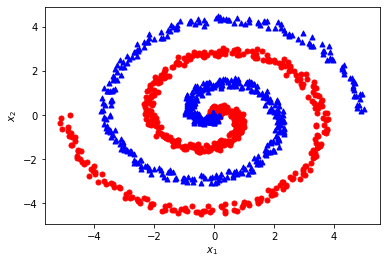

In [21]:
df1 = df[df[2] == 1]
df2 = df[df[2] == 0]

ax = df1.plot.scatter(0 ,1 , s=25, c="red")
df2.plot.scatter(0, 1, s=25, c="blue", ax=ax, marker="^")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [22]:
X = np.array(df[[0,1]]).T
Y = np.array(df[[2]]).T

In [23]:
np.random.seed(65468)

In [24]:
number_of_neuron = 5
parameters = initialization_parameters(X, Y, number_of_neuron, int(1), int(1))
cost, parameters, cost_history = nn_model(X, Y, parameters, number_of_iter=1000)

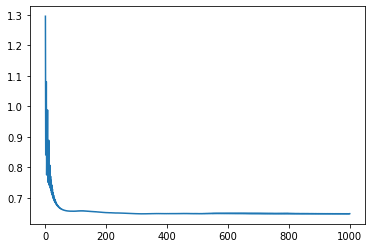

In [25]:
x = np.arange(1,1001)

plt.plot(x, cost_history)

In [26]:
parameters

{'W1': array([[ 1.1130454 , -0.15915515],
        [-0.75480382, -0.82917013],
        [ 0.50839213, -1.19474356],
        [ 1.42440907,  0.18953384],
        [-0.92081702, -0.96093527]]),
 'W2': array([[ 1.1595884 , -0.96208439, -0.04328059, -0.99990127,  1.28030365]]),
 'b1': array([[ 0.52663397],
        [ 0.24648268],
        [-0.65129519],
        [-0.57368877],
        [-0.42276936]]),
 'b2': array([[-0.39568103]])}

In [27]:
cost_history[-1]

0.6481273963037495

In [28]:
cost

0.6481273963037495

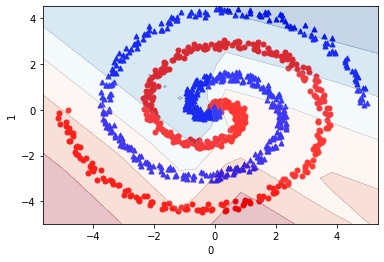

In [29]:
def plot_decision_boundary(X, Y, cmap='RdBu_r'):

  h = 0.5
  x_min, x_max = X[0,:].min() - h, X[0,:].max() + h
  y_min, y_max = X[1,:].min() - h, X[1,:].max() + h
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
  A2, cache = forward_prop(np.c_[xx.ravel(), yy.ravel()].T, parameters)
  A2 = A2.reshape(xx.shape)
  
  ax = df1.plot.scatter(0 ,1 , s=25, c="red", cmap=cmap)
  df2.plot.scatter(0, 1, s=25, c="blue", ax=ax, marker="^", cmap=cmap)
  
  ax.contourf(xx, yy, A2, cmap=cmap, alpha=0.25)
  ax.contour(xx, yy, A2, colors='k', linewidths=0.1)

plot_decision_boundary(X, Y)